# Predict GTEx L1000 to RNA-seq

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from numpy.random import seed
import umap
from sklearn.manifold import TSNE
import seaborn as sns
randomState = 123
seed(randomState)
from sklearn.metrics import mean_squared_error

## Predict-one-by-one

In [2]:
step1_exp_index = 38
step2_exp_index = 35

# step1_y_true_filename = "y_true_L1000_MCF7.txt"
# step1_y_pred_filename = "y_pred_L1000_MCF7.txt"
# step2_y_true_filename = "y_true_ARCHS4_MCF7.txt"
# step2_y_pred_filename = "y_pred_ARCHS4_MCF7.txt"
# eval_dataset_nameA = "L1000_MCF7"
# eval_dataset_nameB = "ARCHS4_MCF7_landmark"
# eval_output_dataset_name = "ARCHS4_MCF7"

step1_y_true_filename = "y_true_L1000_GTEx.txt"
step1_y_pred_filename = "y_pred_L1000_GTEx.txt"
step2_y_true_filename = "y_true_ARCHS4_GTEx.txt"
step2_y_pred_filename = "y_pred_ARCHS4_GTEx.txt"
eval_dataset_nameA = "GTEx_L1000"
eval_dataset_nameB = "GTEx_RNAseq_landmark"
eval_output_dataset_name = "GTEx_RNAseq"

step1_viz_folder = f"../output/{step1_exp_index}/viz/"


## Predict-Step1

In [3]:
!python functions/cyclegan_transcript.py --eval_dataset_nameA $eval_dataset_nameA --eval_dataset_nameB $eval_dataset_nameB --ispredicting --exp_index $step1_exp_index --load_model_index 99 --y_true_output_filename $step1_y_true_filename --y_pred_output_filename $step1_y_pred_filename --prediction_folder ../output/$step1_exp_index/prediction/ --evaluation --shuffle

{'epoch_resume': 0, 'n_epochs': 100, 'dataset_nameA': 'L1000', 'dataset_nameB': 'ARCHS4', 'batch_size': 100, 'lr': 0.0002, 'b1': 0.9, 'b2': 0.999, 'weight_decay': 1e-05, 'decay_epoch': 50, 'n_cpu': 8, 'input_dimA': 962, 'hidden_dimA': 512, 'output_dimA': 128, 'input_dimB': 962, 'hidden_dimB': 512, 'output_dimB': 128, 'num_samples': 50000, 'sample_interval': 100, 'checkpoint_interval': 10, 'n_residual_blocks': 1, 'lambda_cyc': 10.0, 'lambda_id': 10.0, 'load_model_index': 100, 'eval_dataset_nameA': 'L1000_MCF7', 'eval_dataset_nameB': 'ARCHS4_MCF7_landmark', 'exp_index': 38, 'ispredicting': False, 'cell_line': None, 'gamma': 0.1, 'shuffle': False, 'evaluation': False, 'y_true_output_filename': None, 'y_pred_output_filename': None, 'prediction_folder': '../output/38/prediction/', 'benchmark_evaluation': True, 'gene_weights': True}
Namespace(b1=0.9, b2=0.999, batch_size=1, benchmark_evaluation=False, cell_line=None, checkpoint_interval=10, dataset_nameA='L1000', dataset_nameB='L1000', decay

## Plotting-Step1

In [3]:
# plot results
y_true_step1 = pd.read_csv(f"../output/{step1_exp_index}/prediction/{step1_y_true_filename}", sep="\t", index_col=0)
y_pred_step1 = pd.read_csv(f"../output/{step1_exp_index}/prediction/{step1_y_pred_filename}", sep="\t", index_col=0)
y_input_step1 = pd.read_csv(f"../output/{step1_exp_index}/prediction/y_input.txt", sep="\t", index_col=0)

# shuffled_y_true = pd.read_csv(f"../output/{exp_index}/prediction/shuffle_y_true.txt", sep="\t", header=None)
# shuffled_y_pred = pd.read_csv(f"../output/{exp_index}/prediction/shuffle_y_pred.txt", sep="\t", header=None)
print(f"../output/{step1_exp_index}/prediction/{step1_y_true_filename}")
print(f"../output/{step1_exp_index}/prediction/{step1_y_pred_filename}")
print(f"../output/{step1_exp_index}/prediction/y_input.txt")

../output/38/prediction/y_true_L1000_GTEx.txt
../output/38/prediction/y_pred_L1000_GTEx.txt
../output/38/prediction/y_input.txt


### Scatter plot for each sample

       y_true    y_pred  y_input
0    7.594481  8.075895  10.8294
1    2.070366  5.163337   6.6008
2    5.226703  4.829072   4.9596
3    6.674856  7.180182  10.4606
4    5.553604  5.835322   9.5251
..        ...       ...      ...
957  5.914189  4.633821  11.4878
958  5.020206  5.267176   9.3425
959  3.017116  2.601721   6.4341
960  3.846611  3.299022   6.5763
961  5.135518  5.922174   9.8730

[962 rows x 3 columns]


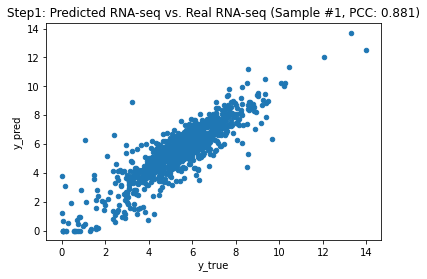

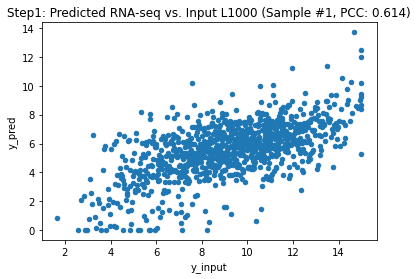

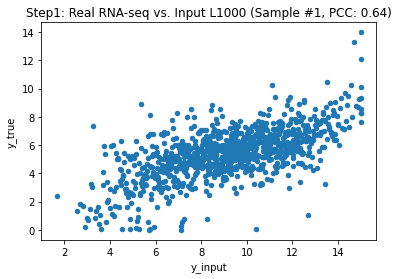

In [8]:
i = 1
y_true_avg = y_true_step1.iloc[i, :]
y_pred_avg = y_pred_step1.iloc[i, :]
y_input_avg = y_input_step1.iloc[i, :]

tmpdf = pd.DataFrame([y_true_avg.tolist(), y_pred_avg.tolist(), y_input_avg.tolist()]).T
tmpdf.columns = ["y_true", "y_pred", "y_input"]
print(tmpdf)


pcc = round(pearsonr(y_true_avg.tolist(), y_pred_avg.tolist())[0], 3)
title = f"Step1: Predicted RNA-seq vs. Real RNA-seq (Sample #{i}, PCC: {pcc})"
tmpdf.plot.scatter(x='y_true', y='y_pred', title=title)
plt.savefig(step1_viz_folder+title+".png", bbox_inches='tight')


pcc = round(pearsonr(y_input_avg.tolist(), y_pred_avg.tolist())[0], 3)
title = f"Step1: Predicted RNA-seq vs. Input L1000 (Sample #{i}, PCC: {pcc})"
tmpdf.plot.scatter(x='y_input', y='y_pred', title=title)
plt.savefig(step1_viz_folder+title+".png", bbox_inches='tight')

pcc = round(pearsonr(y_input_avg.tolist(), y_true_avg.tolist())[0], 3)
title = f"Step1: Real RNA-seq vs. Input L1000 (Sample #{i}, PCC: {pcc})"
tmpdf.plot.scatter(x='y_input', y='y_true', title=title)
plt.savefig(step1_viz_folder+title+".png", bbox_inches='tight')


### Scatter plot for each gene

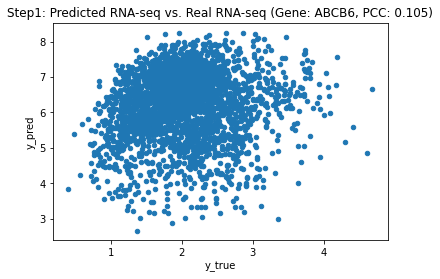

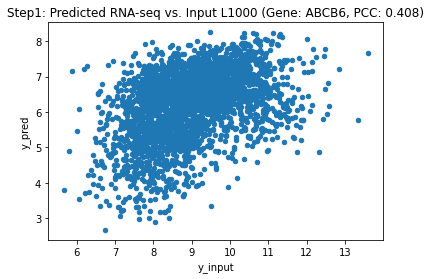

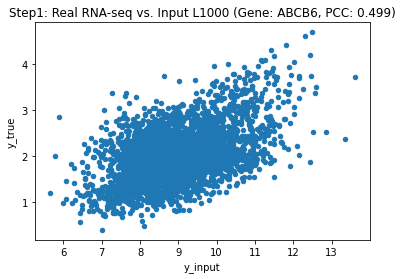

In [5]:

pcc_list_y_pred_y_true = list()
pcc_list_y_pred_y_input = list()
pcc_list_y_input_y_true = list()
for i in range(y_true.shape[1]):
    y_true_avg = y_true_step1.iloc[:, i]
    y_pred_avg = y_pred_step1.iloc[:, i]
    y_input_avg = y_input_step1.iloc[:, i]

    gene = y_true_step1.columns[i]
    if gene != "ABCB6":
        continue
    tmpdf = pd.DataFrame([y_true_avg.tolist(), y_pred_avg.tolist(), y_input_avg.tolist()]).T
    tmpdf.columns = ["y_true", "y_pred", "y_input"]


    pcc = round(pearsonr(y_true_avg.tolist(), y_pred_avg.tolist())[0], 3)
    pcc_list_y_pred_y_true.append(pearsonr(y_true_avg.tolist(), y_pred_avg.tolist())[0])
    pcc_list_y_pred_y_input.append(pearsonr(y_input_avg.tolist(), y_pred_avg.tolist())[0])
    pcc_list_y_input_y_true.append(pearsonr(y_input_avg.tolist(), y_true_avg.tolist())[0])

    # if pcc < 0.5:
    #     i += 1
    #     continue
    # print(tmpdf)
    title = f"Step1: Predicted RNA-seq vs. Real RNA-seq (Gene: {gene}, PCC: {pcc})"
    tmpdf.plot.scatter(x='y_true', y='y_pred', title=title)
    plt.savefig(step1_viz_folder+title+".png", bbox_inches='tight')

    pcc = round(pearsonr(y_input_avg.tolist(), y_pred_avg.tolist())[0], 3)
    title = f"Step1: Predicted RNA-seq vs. Input L1000 (Gene: {gene}, PCC: {pcc})"
    tmpdf.plot.scatter(x='y_input', y='y_pred', title=title)
    plt.savefig(step1_viz_folder+title+".png", bbox_inches='tight')

    pcc = round(pearsonr(y_input_avg.tolist(), y_true_avg.tolist())[0], 3)
    title = f"Step1: Real RNA-seq vs. Input L1000 (Gene: {gene}, PCC: {pcc})"
    tmpdf.plot.scatter(x='y_input', y='y_true', title=title)
    plt.savefig(step1_viz_folder+title+".png", bbox_inches='tight')

    break


### Violin plot for samples

In [6]:
pcc_y_true_vs_y_pred = list()
pcc_y_input_vs_y_pred = list()
pcc_y_input_vs_y_true = list()
pcc_y_pred_vs_y_random_true = list()

rmse_y_true_vs_y_pred = list()
rmse_y_input_vs_y_pred = list()
rmse_y_input_vs_y_true = list()
rmse_y_pred_vs_y_random_true = list()

for i in range(y_true_step1.shape[0]):
    if i % 100 == 0:
        print(i, end="\r")
    y_true_avg = y_true_step1.iloc[i, :]
    y_pred_avg = y_pred_step1.iloc[i, :]
    y_input_avg = y_input_step1.iloc[i, :]


    # pcc
    pcc = pearsonr(y_true_avg.tolist(), y_pred_avg.tolist())[0]
    pcc_y_true_vs_y_pred.append(pcc)

    pcc = pearsonr(y_input_avg.tolist(), y_pred_avg.tolist())[0]
    pcc_y_input_vs_y_pred.append(pcc)

    pcc = pearsonr(y_input_avg.tolist(), y_true_avg.tolist())[0]
    pcc_y_input_vs_y_true.append(pcc)

    k = random.randrange(y_true_step1.shape[0])
    pcc = pearsonr(y_pred_avg.tolist(), y_true_step1.iloc[k, :].tolist())[0]
    pcc_y_pred_vs_y_random_true.append(pcc)

    # rmse
    rmse = mean_squared_error(y_true_avg.tolist(), y_pred_avg.tolist(), squared=True)
    rmse_y_true_vs_y_pred.append(rmse)

    rmse = mean_squared_error(y_input_avg.tolist(), y_pred_avg.tolist(), squared=True)
    rmse_y_input_vs_y_pred.append(rmse)

    rmse = mean_squared_error(y_input_avg.tolist(), y_true_avg.tolist(), squared=True)
    rmse_y_input_vs_y_true.append(rmse)

    k = random.randrange(y_true_step1.shape[0])
    rmse = mean_squared_error(y_pred_avg.tolist(), y_true_step1.iloc[k, :].tolist(), squared=True)
    rmse_y_pred_vs_y_random_true.append(rmse)



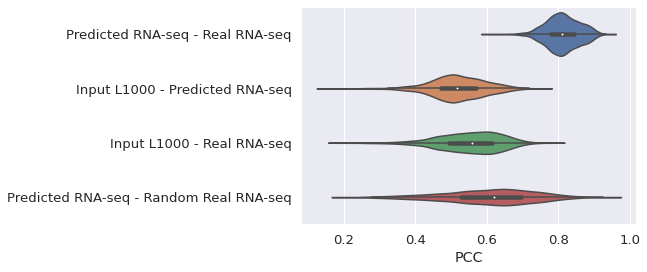

0.8116981892628973 0.04713175250900927
0.5175126906065545 0.0777503151539444
0.5513993236682194 0.08594330551930725
0.6055572360618539 0.1245701617638186
1.4503725706340795 0.3635504435089899
16.90497531396385 2.2619581651758702
18.08551900930975 2.4320276982151694
3.0176272784466005 1.09863025372914


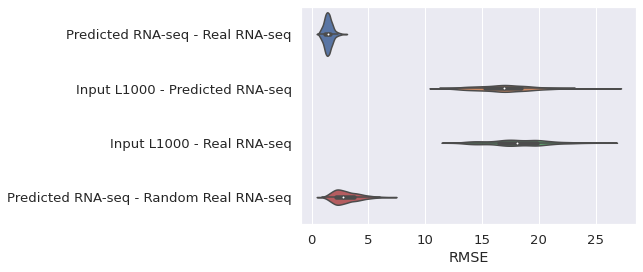

In [12]:
# violin plot
sns.set(font_scale=1.2)
pcc_df = pd.DataFrame({'Predicted RNA-seq - Real RNA-seq': pcc_y_true_vs_y_pred, 'Input L1000 - Predicted RNA-seq': pcc_y_input_vs_y_pred, 'Input L1000 - Real RNA-seq': pcc_y_input_vs_y_true, 'Predicted RNA-seq - Random Real RNA-seq': pcc_y_pred_vs_y_random_true})
ax = sns.violinplot(data=pcc_df, orient='h')
# ax.set_title('Violin plots for samples')

ax.set_xlabel('PCC')
plt.savefig(step1_viz_folder+'violin_plot_for_samples.png', bbox_inches='tight')
plt.savefig(step1_viz_folder+'violin_plot_for_samples.pdf', bbox_inches='tight')
plt.savefig(step1_viz_folder+'violin_plot_for_samples.svg', bbox_inches='tight')
plt.show()
# get avg PCC
print(np.mean(pcc_y_true_vs_y_pred), np.std(pcc_y_true_vs_y_pred))
print(np.mean(pcc_y_input_vs_y_pred), np.std(pcc_y_input_vs_y_pred))
print(np.mean(pcc_y_input_vs_y_true), np.std(pcc_y_input_vs_y_true))
print(np.mean(pcc_y_pred_vs_y_random_true), np.std(pcc_y_pred_vs_y_random_true))

# violin plot
rmse_df = pd.DataFrame({'Predicted RNA-seq - Real RNA-seq': rmse_y_true_vs_y_pred, 'Input L1000 - Predicted RNA-seq': rmse_y_input_vs_y_pred, 'Input L1000 - Real RNA-seq': rmse_y_input_vs_y_true, 'Predicted RNA-seq - Random Real RNA-seq': rmse_y_pred_vs_y_random_true})
ax = sns.violinplot(data=rmse_df, orient='h')
# ax.set_title('Violin plots for samples')
ax.set_xlabel('RMSE')
plt.savefig(step1_viz_folder+'violin_plot_for_samples_rmse.png', bbox_inches='tight')
plt.savefig(step1_viz_folder+'violin_plot_for_samples_rmse.pdf', bbox_inches='tight')
plt.savefig(step1_viz_folder+'violin_plot_for_samples_rmse.svg', bbox_inches='tight')

# get avg PCC
print(np.mean(rmse_y_true_vs_y_pred), np.std(rmse_y_true_vs_y_pred))
print(np.mean(rmse_y_input_vs_y_pred), np.std(rmse_y_input_vs_y_pred))
print(np.mean(rmse_y_input_vs_y_true), np.std(rmse_y_input_vs_y_true))
print(np.mean(rmse_y_pred_vs_y_random_true), np.std(rmse_y_pred_vs_y_random_true))


### Violin plot for genes

In [20]:
pcc_y_true_vs_y_pred = list()
pcc_y_input_vs_y_pred = list()
pcc_y_input_vs_y_true = list()
pcc_y_pred_vs_y_random_true = list()

rmse_y_true_vs_y_pred = list()
rmse_y_input_vs_y_pred = list()
rmse_y_input_vs_y_true = list()
rmse_y_pred_vs_y_random_true = list()

for i in range(y_true_step1.shape[1]):
    if i % 100 == 0:
        print("\r", i, end="")
    y_true_avg = y_true_step1.iloc[:, i]
    y_pred_avg = y_pred_step1.iloc[:, i]
    y_input_avg = y_input_step1.iloc[:, i]

    # pcc
    pcc = pearsonr(y_true_avg.tolist(), y_pred_avg.tolist())[0]
    pcc_y_true_vs_y_pred.append(pcc)

    pcc = pearsonr(y_input_avg.tolist(), y_pred_avg.tolist())[0]
    pcc_y_input_vs_y_pred.append(pcc)

    pcc = pearsonr(y_input_avg.tolist(), y_true_avg.tolist())[0]
    pcc_y_input_vs_y_true.append(pcc)

    k = random.randrange(y_true_step1.shape[1])
    pcc = pearsonr(y_pred_avg.tolist(), y_true_step1.iloc[:, k].tolist())[0]
    pcc_y_pred_vs_y_random_true.append(pcc)

    # rmse
    rmse = mean_squared_error(y_true_avg.tolist(), y_pred_avg.tolist(), squared=True)
    rmse_y_true_vs_y_pred.append(rmse)

    rmse = mean_squared_error(y_input_avg.tolist(), y_pred_avg.tolist(), squared=True)
    rmse_y_input_vs_y_pred.append(rmse)

    rmse = mean_squared_error(y_input_avg.tolist(), y_true_avg.tolist(), squared=True)
    rmse_y_input_vs_y_true.append(rmse)

    k = random.randrange(y_true_step1.shape[1])
    rmse = mean_squared_error(y_pred_avg.tolist(), y_true_step1.iloc[:, k].tolist(), squared=True)
    rmse_y_pred_vs_y_random_true.append(rmse)




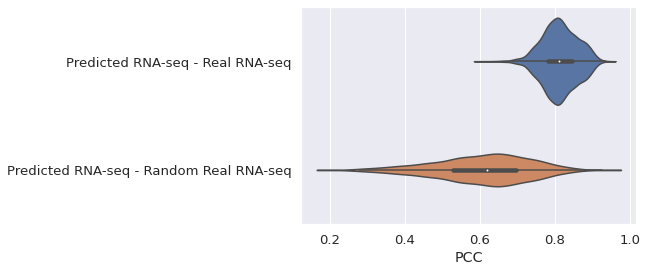

0.8116981892628973 0.04713175250900927
0.5175126906065545 0.0777503151539444
0.5513993236682194 0.08594330551930725
0.6055572360618539 0.1245701617638186


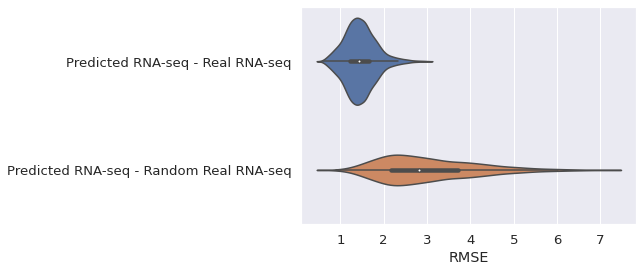

1.4503725706340795 0.3635504435089899
16.90497531396385 2.2619581651758702
18.08551900930975 2.4320276982151694
3.0176272784466005 1.09863025372914


In [14]:
# violin plot
sns.set(font_scale=1.2)
pcc_df = pd.DataFrame({'Predicted RNA-seq - Real RNA-seq': pcc_y_true_vs_y_pred, 
# 'Input L1000 - Predicted RNA-seq': pcc_y_input_vs_y_pred, 
# 'Input L1000 - Real RNA-seq': pcc_y_input_vs_y_true, 
'Predicted RNA-seq - Random Real RNA-seq': pcc_y_pred_vs_y_random_true})
ax = sns.violinplot(data=pcc_df, orient='h')
# ax.set_title('Violin plots for genes')
ax.set_xlabel('PCC')
plt.savefig(step1_viz_folder+'violin_plot_for_genes_pcc.png', bbox_inches='tight')
plt.savefig(step1_viz_folder+'violin_plot_for_genes_pcc.pdf', bbox_inches='tight')
plt.savefig(step1_viz_folder+'violin_plot_for_genes_pcc.svg', bbox_inches='tight')
plt.show()

# get avg PCC
print(np.mean(pcc_y_true_vs_y_pred), np.std(pcc_y_true_vs_y_pred))
print(np.mean(pcc_y_input_vs_y_pred), np.std(pcc_y_input_vs_y_pred))
print(np.mean(pcc_y_input_vs_y_true), np.std(pcc_y_input_vs_y_true))
print(np.mean(pcc_y_pred_vs_y_random_true), np.std(pcc_y_pred_vs_y_random_true))

# violin plot
rmse_df = pd.DataFrame({'Predicted RNA-seq - Real RNA-seq': rmse_y_true_vs_y_pred, 
# 'Input L1000 - Predicted RNA-seq': rmse_y_input_vs_y_pred, 
# 'Input L1000 - Real RNA-seq': rmse_y_input_vs_y_true, 
'Predicted RNA-seq - Random Real RNA-seq': rmse_y_pred_vs_y_random_true})
ax = sns.violinplot(data=rmse_df, orient='h')
# ax.set_title('Violin plots for genes')
ax.set_xlabel('RMSE')
plt.savefig(step1_viz_folder+'violin_plot_for_genes_rmse.png', bbox_inches='tight')
plt.savefig(step1_viz_folder+'violin_plot_for_genes_rmse.pdf', bbox_inches='tight')
plt.savefig(step1_viz_folder+'violin_plot_for_genes_rmse.svg', bbox_inches='tight')
plt.show()
# get avg PCC
print(np.mean(rmse_y_true_vs_y_pred), np.std(rmse_y_true_vs_y_pred))
print(np.mean(rmse_y_input_vs_y_pred), np.std(rmse_y_input_vs_y_pred))
print(np.mean(rmse_y_input_vs_y_true), np.std(rmse_y_input_vs_y_true))
print(np.mean(rmse_y_pred_vs_y_random_true), np.std(rmse_y_pred_vs_y_random_true))


## Predict-Step 2

In [3]:
!python functions/extrapolation_transcript.py --eval_input_dataset_name ../output/$step1_exp_index/prediction/$step1_y_pred_filename --eval_output_dataset_name $eval_output_dataset_name --ispredicting --exp_index $step2_exp_index --y_true_output_filename $step2_y_true_filename --y_pred_output_filename $step2_y_pred_filename --eval_exp_index $step1_exp_index --prediction_folder ../output/$step1_exp_index/prediction/ --evaluation 

{'epoch_resume': 0, 'n_epochs': 100, 'input_dataset_name': 'ARCHS4_50000_input', 'output_dataset_name': 'ARCHS4_50000_output', 'batch_size': 100, 'lr': 0.0002, 'b1': 0.9, 'b2': 0.999, 'decay_epoch': 10, 'n_cpu': 8, 'input_dim': 962, 'hidden_dim': [2048, 8192], 'output_dim': 23614, 'num_samples': 50000, 'sample_interval': 100, 'checkpoint_interval': 10, 'eval_input_dataset_name': 'GTEx', 'eval_output_dataset_name': 'GTEx', 'eval_exp_index': 8, 'exp_index': 35, 'ispredicting': False, 'cell_line': None, 'gamma': 0.5, 'shuffle': False, 'valid_ratio': 0.01, 'test_ratio': 0.01, 'y_true_output_filename': 'y_true.txt', 'y_pred_output_filename': 'y_pred.txt', 'early_stopping': True, 'early_stopping_epoch': 3, 'early_stopping_tol': 0.0001, 'evaluation': False, 'prediction_folder': '../output_step2/35/prediction/', 'output_gene_list': 'prediction_gene_list.txt', 'weight_decay': 0.0001}
Namespace(b1=0.9, b2=0.999, batch_size=1, cell_line=None, checkpoint_interval=10, decay_epoch=100, early_stoppin

## Plotting-Step2

In [15]:
# plot results
y_true_step2 = pd.read_csv(f"../output/{step1_exp_index}/prediction/{step2_y_true_filename}", sep="\t", index_col=0)
y_pred_step2 = pd.read_csv(f"../output/{step1_exp_index}/prediction/{step2_y_pred_filename}", sep="\t", index_col=0)
# y_input = pd.read_csv(f"../output_step2/{exp_index}/prediction/y_input.txt", sep="\t", header=None)

# shuffled_y_true = pd.read_csv(f"../output/{exp_index}/prediction/shuffle_y_true.txt", sep="\t", header=None)
# shuffled_y_pred = pd.read_csv(f"../output/{exp_index}/prediction/shuffle_y_pred.txt", sep="\t", header=None)

print(f"../output/{step1_exp_index}/prediction/{step2_y_true_filename}")


../output/38/prediction/y_true_ARCHS4_GTEx.txt


         y_true     y_pred
0      2.057348   5.719041
1      1.719205   0.908108
2      4.515594   4.807742
3      0.363373   1.088987
4      0.363373   4.004190
...         ...        ...
22235  0.150663   1.346298
22236  4.979666  10.929541
22237  9.973838  18.570786
22238  6.891312  18.449442
22239  4.152493  11.062346

[22240 rows x 2 columns]
0.926513740870427


<AxesSubplot:xlabel='y_true', ylabel='y_pred'>

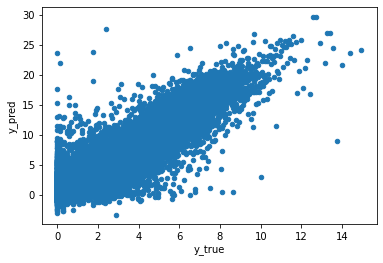

In [16]:
y_true_avg = y_true.iloc[0, :]
y_pred_avg = y_pred.iloc[0, :]
tmpdf = pd.DataFrame([y_true_avg.tolist(), y_pred_avg.tolist()]).T
tmpdf.columns = ["y_true", "y_pred"]
tmpdf = tmpdf.dropna()
print(tmpdf)
print(pearsonr(tmpdf.iloc[:, 0].tolist(), tmpdf.iloc[:, 1].tolist())[0])
tmpdf.plot.scatter(x='y_true', y='y_pred')


         y_true    y_pred
0      2.274041  2.121880
1      0.549585  0.419435
2      8.439444  5.818987
3      1.995074  0.815984
4      0.452811  0.571558
...         ...       ...
22235  0.651256  1.052418
22236  5.377364  5.280915
22237  7.680373  6.883257
22238  6.561184  6.277505
22239  5.009871  5.711302

[22240 rows x 2 columns]
0.9622250907271754


<AxesSubplot:xlabel='y_true', ylabel='y_pred'>

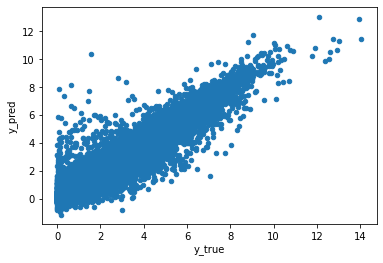

In [17]:
y_true_avg = y_true.mean()
y_pred_avg = y_pred.mean()
tmpdf = pd.DataFrame([y_true_avg.tolist(), y_pred_avg.tolist()]).T
tmpdf.columns = ["y_true", "y_pred"]
print(tmpdf)
print(pearsonr(y_true_avg.tolist(), y_pred_avg.tolist())[0])
tmpdf.plot.scatter(x='y_true', y='y_pred')


In [18]:
print(pearsonr(y_true.iloc[0, :], y_true.iloc[1, :]))
print(pearsonr(y_pred.iloc[0, :], y_pred.iloc[1, :]))

(0.7246963596676307, 0.0)
(0.7673012563929167, 0.0)


### violin plots for samples

In [16]:
pcc_y_true_vs_y_pred = list()
pcc_y_pred_vs_y_random_true = list()

rmse_y_true_vs_y_pred = list()
rmse_y_pred_vs_y_random_true = list()

for i in range(y_true_step2.shape[0]):
    if i % 100 == 0:
        print(i)
    y_true_avg = y_true_step2.iloc[i, :]
    y_pred_avg = y_pred_step2.iloc[i, :]
    # y_input_avg = y_input.iloc[i, :]

    pcc = pearsonr(y_true_avg.tolist(), y_pred_avg.tolist())[0]
    pcc_y_true_vs_y_pred.append(pcc)
    rmse = mean_squared_error(y_true_avg.tolist(), y_pred_avg.tolist(), squared=True)
    rmse_y_true_vs_y_pred.append(rmse)


    k = random.randrange(y_true_step2.shape[0])
    pcc = pearsonr(y_pred_avg.tolist(), y_true_step2.iloc[k, :].tolist())[0]
    pcc_y_pred_vs_y_random_true.append(pcc)

    rmse = mean_squared_error(y_pred_avg.tolist(), y_true_step2.iloc[k, :].tolist(), squared=True)
    rmse_y_pred_vs_y_random_true.append(rmse)
     




0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


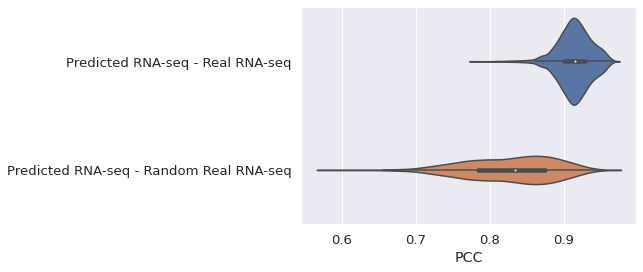

0.9138686151783193 0.022704528050570272
0.8270482485506687 0.059565479663941025


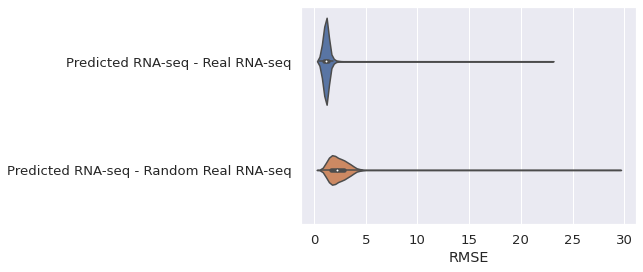

1.1670730305888692 0.4962476143296151
2.322098726348043 0.958360753582821


In [17]:
# violin plot
sns.set(font_scale=1.2)
pcc_df = pd.DataFrame({'Predicted RNA-seq - Real RNA-seq': pcc_y_true_vs_y_pred, 'Predicted RNA-seq - Random Real RNA-seq': pcc_y_pred_vs_y_random_true})
ax = sns.violinplot(data=pcc_df, orient='h')
# ax.set_title('Violin plots for samples')
ax.set_xlabel('PCC')
plt.savefig(step1_viz_folder+'violin_plot_for_samples_pcc_step2.png', bbox_inches='tight')
plt.savefig(step1_viz_folder+'violin_plot_for_samples_pcc_step2.pdf', bbox_inches='tight')
plt.savefig(step1_viz_folder+'violin_plot_for_samples_pcc_step2.svg', bbox_inches='tight')
plt.show()
# get avg PCC
print(np.mean(pcc_y_true_vs_y_pred), np.std(pcc_y_true_vs_y_pred))
print(np.mean(pcc_y_pred_vs_y_random_true), np.std(pcc_y_pred_vs_y_random_true))

# violin plot
rmse_df = pd.DataFrame({'Predicted RNA-seq - Real RNA-seq': rmse_y_true_vs_y_pred, 'Predicted RNA-seq - Random Real RNA-seq': rmse_y_pred_vs_y_random_true})
ax = sns.violinplot(data=rmse_df, orient='h')
# ax.set_title('Violin plots for samples')
ax.set_xlabel('RMSE')
plt.savefig(step1_viz_folder+'violin_plot_for_samples_rmse_step2.png', bbox_inches='tight')
plt.savefig(step1_viz_folder+'violin_plot_for_samples_rmse_step2.pdf', bbox_inches='tight')
plt.savefig(step1_viz_folder+'violin_plot_for_samples_rmse_step2.svg', bbox_inches='tight')
plt.show()
# get avg RMSE
print(np.mean(rmse_y_true_vs_y_pred), np.std(rmse_y_true_vs_y_pred))
print(np.mean(rmse_y_pred_vs_y_random_true), np.std(rmse_y_pred_vs_y_random_true))

### violin plots for genes

In [18]:
pcc_y_true_vs_y_pred = list()
pcc_y_pred_vs_y_random_true = list()

rmse_y_true_vs_y_pred = list()
rmse_y_pred_vs_y_random_true = list()

for i in range(y_true_step2.shape[1]):
    if i % 100 == 0:
        print(i)
    y_true_avg = y_true_step2.iloc[:, i]
    y_pred_avg = y_pred_step2.iloc[:, i]
    # y_input_avg = y_input.iloc[i, :]
    # print(y_true_avg.tolist())
    # print(y_pred_avg.tolist())
    
    pcc = pearsonr(y_true_avg.tolist(), y_pred_avg.tolist())[0]
    if np.isnan(pcc) == True:        
        continue
    k = random.randrange(y_true_step2.shape[1])
    random_pcc = pearsonr(y_pred_avg.tolist(), y_true_step2.iloc[:, k].tolist())[0]
    if np.isnan(random_pcc) == True:        
        continue

    pcc_y_true_vs_y_pred.append(pcc)
    rmse = mean_squared_error(y_true_avg.tolist(), y_pred_avg.tolist(), squared=True)
    rmse_y_true_vs_y_pred.append(rmse)


    
    pcc_y_pred_vs_y_random_true.append(random_pcc)

    rmse = mean_squared_error(y_pred_avg.tolist(), y_true_step2.iloc[:, k].tolist(), squared=True)
    rmse_y_pred_vs_y_random_true.append(rmse)
    # break




0
100
/home/maayanlab/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/maayanlab/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/maayanlab/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/maayanlab/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/maayanlab/an

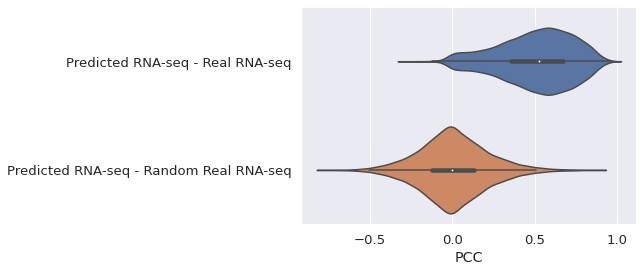

0.5023543083599331 0.2248547819173754
0.006143126324873722 0.20990483746969163


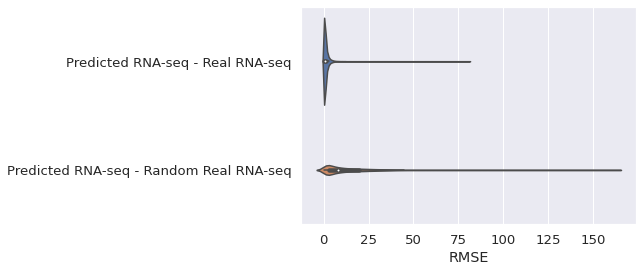

1.1959399606201377 1.987059358399648
13.282680593256341 14.230372140119272


In [19]:
# violin plot
sns.set(font_scale=1.2)
pcc_df = pd.DataFrame({'Predicted RNA-seq - Real RNA-seq': pcc_y_true_vs_y_pred, 'Predicted RNA-seq - Random Real RNA-seq': pcc_y_pred_vs_y_random_true})
ax = sns.violinplot(data=pcc_df, orient='h')
# ax.set_title('Violin plots for genes')
ax.set_xlabel('PCC')
plt.savefig(step1_viz_folder+'violin_plot_for_genes_pcc_step2.png', bbox_inches='tight')
plt.savefig(step1_viz_folder+'violin_plot_for_genes_pcc_step2.pdf', bbox_inches='tight')
plt.savefig(step1_viz_folder+'violin_plot_for_genes_pcc_step2.svg', bbox_inches='tight')
plt.show()
# get avg PCC
print(np.mean(pcc_y_true_vs_y_pred), np.std(pcc_y_true_vs_y_pred))
print(np.mean(pcc_y_pred_vs_y_random_true), np.std(pcc_y_pred_vs_y_random_true))

# violin plot
rmse_df = pd.DataFrame({'Predicted RNA-seq - Real RNA-seq': rmse_y_true_vs_y_pred, 'Predicted RNA-seq - Random Real RNA-seq': rmse_y_pred_vs_y_random_true})
ax = sns.violinplot(data=rmse_df, orient='h')
# ax.set_title('Violin plots for genes')
ax.set_xlabel('RMSE')
plt.savefig(step1_viz_folder+'violin_plot_for_genes_rmse_step2.png', bbox_inches='tight')
plt.savefig(step1_viz_folder+'violin_plot_for_genes_rmse_step2.pdf', bbox_inches='tight')
plt.savefig(step1_viz_folder+'violin_plot_for_genes_rmse_step2.svg', bbox_inches='tight')
plt.show()
# get avg RMSE
print(np.mean(rmse_y_true_vs_y_pred), np.std(rmse_y_true_vs_y_pred))
print(np.mean(rmse_y_pred_vs_y_random_true), np.std(rmse_y_pred_vs_y_random_true))

## Plot for loss

In [27]:
step1_exp_index = 38
# Read in loss files
G_loss_file = os.path.join(
    os.path.dirname(os.getcwd()),
    "output", str(step1_exp_index),"logs", "G_loss.txt")

D_loss_file = os.path.join(
    os.path.dirname(os.getcwd()),
    "output", str(step1_exp_index),"logs", "D_loss.txt")

with open(G_loss_file, "r") as f:
    G_loss = [x.strip() for x in f.readlines()]
with open(D_loss_file, "r") as f:
    D_loss = [x.strip() for x in f.readlines()]


G_loss_data = pd.DataFrame(G_loss, dtype="float64")
D_loss_data = pd.DataFrame(D_loss, dtype="float64")#pd.read_csv(D_loss_file, header=None, sep=',').T

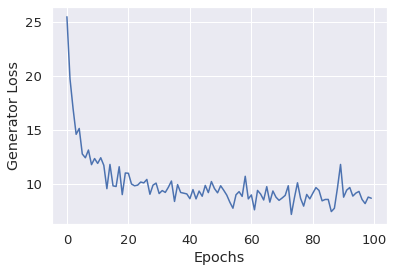

In [28]:
# Generator loss
G_loss_out_file = os.path.join(
    os.path.dirname(os.getcwd()),
    "output",str(step1_exp_index),"viz", "G_loss_plot.jpg")

fig = plt.figure()
plt.plot(G_loss_data.index.tolist(), G_loss_data.iloc[:, 0].values)
# fig.suptitle('Generator Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Generator Loss')
plt.savefig(step1_viz_folder+'G_loss_plot.png', bbox_inches='tight')
plt.savefig(step1_viz_folder+'G_loss_plot.pdf', bbox_inches='tight')
plt.savefig(step1_viz_folder+'G_loss_plot.svg', bbox_inches='tight')

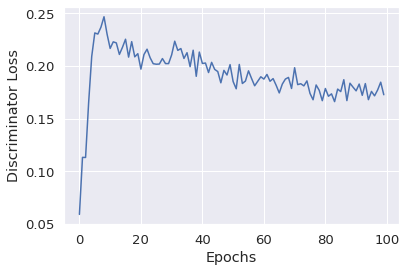

In [29]:
# Discriminator loss
fig = plt.figure()
plt.plot(D_loss_data.index.tolist(), D_loss_data.iloc[:, 0].values)
# fig.suptitle('Discriminator Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Discriminator Loss')
plt.savefig(step1_viz_folder+'D_loss_plot.png', bbox_inches='tight')
plt.savefig(step1_viz_folder+'D_loss_plot.pdf', bbox_inches='tight')
plt.savefig(step1_viz_folder+'D_loss_plot.svg', bbox_inches='tight')


In [30]:
tsne = TSNE(n_components=2)
u = tsne.fit_transform(pd.concat([y_true_step1, y_pred_step1, y_input_step1]))
labels = ["True RNA-seq"]*len(y_true)
labels.extend(["Pred RNA_seq"]*len(y_pred))
# labels.extend(["Input L1000"]*len(y_input))

colors = ["red"]*len(y_true)
colors.extend(["blue"]*len(y_pred))
colors.extend(["yellow"]*len(y_input))
plt.scatter(u[:,0], u[:,1], c=colors)

NameError: name 'y_true' is not defined

In [ ]:
fit = umap.UMAP()
u = fit.fit_transform(y_true)
plt.scatter(u[:,0], u[:,1])